In [56]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform,io
from scipy import signal

from IPython.display import display

In [3]:
mask = np.ones((3, 3))
mask = mask * (1/mask.size)

orig_img = data.camera()
conv_img = np.zeros(shape=orig_img.shape)

mask_shape = mask.shape
orig_img_shape = orig_img.shape

In [5]:
for i  in range(0, orig_img_shape[0] - mask_shape[0]+1):
    for j in range(0, orig_img_shape[1] - mask_shape[1]+1):
        mask_img_mult = orig_img[i:i+mask_shape[0],j:j+mask_shape[1]] * mask
        conv_img[i + 1 , j + 1] = np.sum(mask_img_mult)

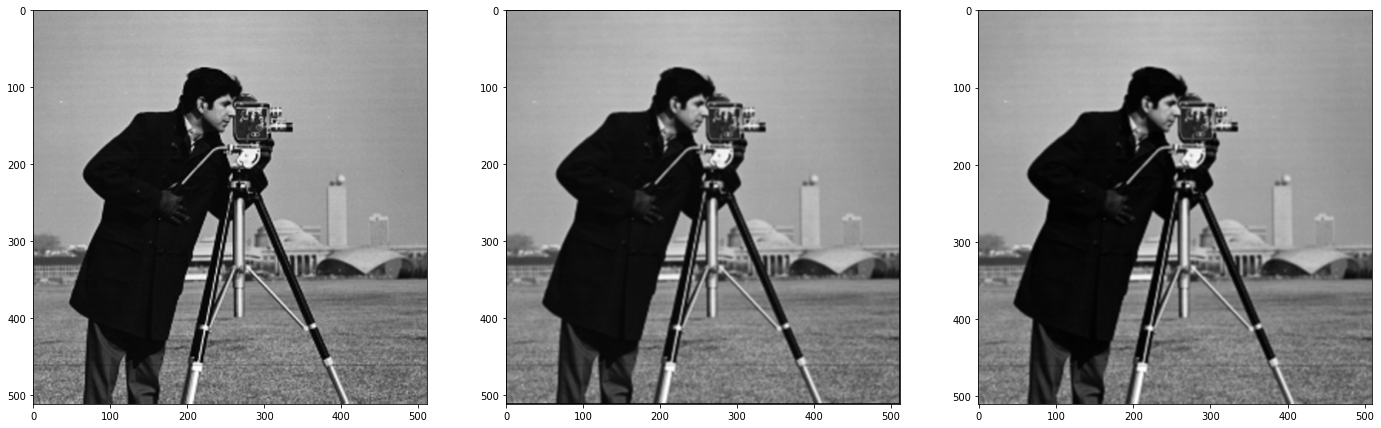

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(131)
plt.imshow(orig_img,cmap='gray')
plt.subplot(132)
plt.imshow(conv_img.astype(dtype=np.uint8),cmap='gray')
plt.subplot(133)
im = signal.convolve2d(orig_img,mask,mode='valid')
plt.imshow(im,cmap='gray')

In [ ]:
gaus_mask = np.array([
    [1,1,1],
    [1,2,1],
    [1,1,1]])/10

gaus_mask2 = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]])/16

gaus_image1 = signal.convolve2d(orig_img,gaus_mask,mode='valid')
gaus_image2 = signal.convolve2d(orig_img,gaus_mask2,mode='valid')
plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(gaus_image1,cmap='gray')
ax1.set_title("Gaussova maska 1")
ax2 = plt.subplot(122)
ax2.imshow(gaus_image2,cmap='gray')
ax2.set_title("Gaussova maska 2")

In [ ]:
lap_op1 = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]])
lap_op2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]])

lap1 = signal.convolve2d(orig_img,lap_op1,mode='valid')
lap2 = signal.convolve2d(orig_img,lap_op2,mode='valid')
plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(lap1,cmap='gray')
ax1.set_title("Laplaceov operátor 1")
ax2 = plt.subplot(122)
ax2.imshow(lap2,cmap='gray')
ax2.set_title("Laplaceov operátor 2")

Text(0.5, 1.0, 'Robertsov operator 2')

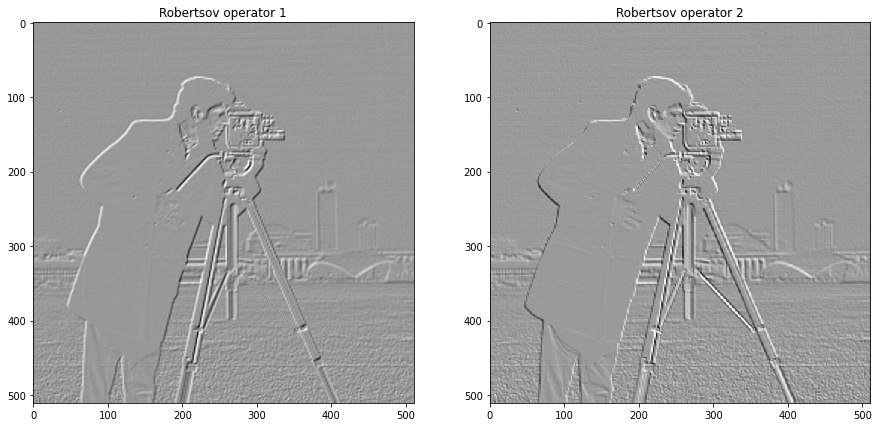

In [40]:
rob_mask1 = np.array([
    [1,0],
    [0,-1]
])
rob_mask2 = np.array([
    [0,1],
    [-1,0]
])

rob1 = signal.convolve2d(orig_img,rob_mask1,mode='valid')
rob2 = signal.convolve2d(orig_img,rob_mask2,mode='valid')
plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(rob1,cmap='Greys')
ax1.set_title("Robertsov operator 1")
ax2 = plt.subplot(122)
ax2.imshow(rob2,cmap='Greys')
ax2.set_title("Robertsov operator 2")

Text(0.5, 1.0, 'Sobelov operator 2')

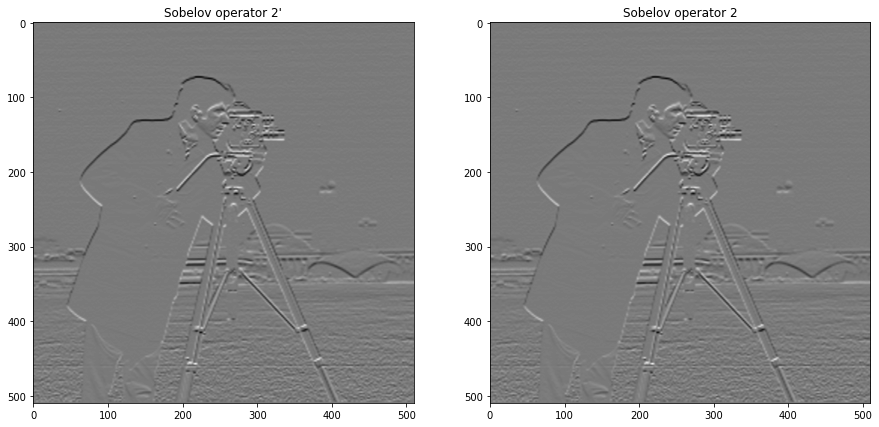

In [42]:
sobel_mask1 = np.array([
  [1,2,1],
  [0,0,0],
  [-1,-2,-1]
])
sobel_mask2 = np.array([
  [0,1,2],
  [-1,0,1],
  [-1,-2,0]
])

sob1 = signal.convolve2d(orig_img,sobel_mask1,mode='valid')
sob2 = signal.convolve2d(orig_img,sobel_mask1,mode='valid')
plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(sob1,cmap='gray')
ax1.set_title("Sobelov operator 2'")
ax2 = plt.subplot(122)
ax2.imshow(sob2,cmap='gray')
ax2.set_title("Sobelov operator 2")

In [ ]:
kernel = mask
orig_img2 = transform.resize(orig_img,np.floor(np.array(orig_img_shape)/30).astype(np.uint8))
full_conv = signal.convolve2d(orig_img2, kernel, mode='full')
same_conv = signal.convolve2d(orig_img2, kernel, mode='same')
valid_conv = signal.convolve2d(orig_img2, kernel, mode='valid')
plt.figure(figsize=(15, 10))
plt.set_cmap('gray')
plt.subplot(131)
plt.imshow(valid_conv)
plt.title("Valid Convolution")
plt.subplot(132)
plt.title("Same Convolution")
plt.imshow(same_conv)
plt.subplot(133)
plt.title("Full Convolution")
plt.imshow(full_conv)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

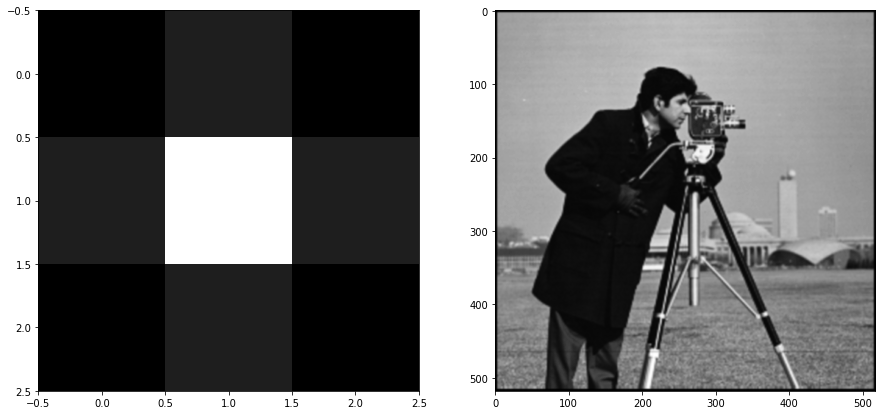

In [74]:
kernel = np.outer(signal.gaussian(3, 0.5), signal.gaussian(3, 0.5))
kernel = kernel / np.sum(kernel)
display(kernel)
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(kernel,cmap="gray")
plt.subplot(122)
plt.imshow(signal.convolve2d(signal.convolve2d(signal.convolve2d(orig_img,kernel),kernel),kernel),cmap="gray")

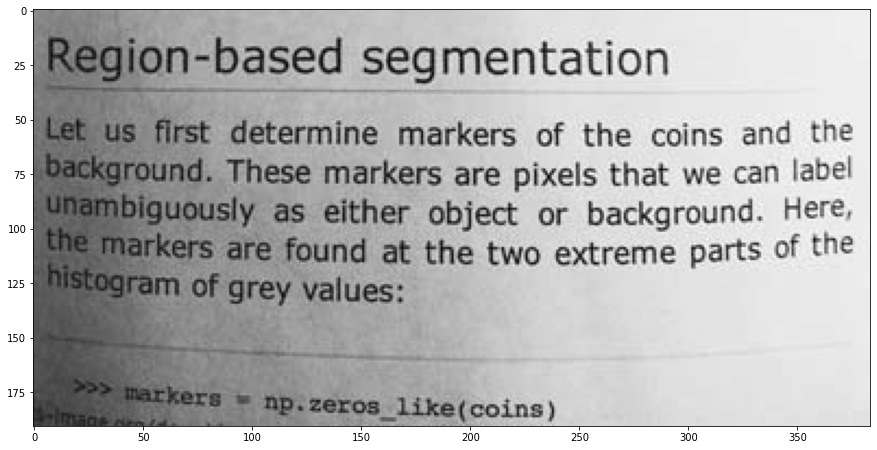

In [46]:
plt.figure(figsize=(15,10))
plt.imshow(data.page(), cmap="gray")

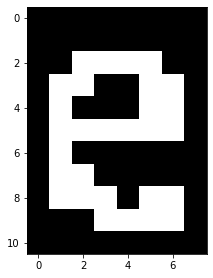

In [68]:
img_with_text = exposure.equalize_adapthist(data.page()) < 0.35
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.imshow(img_with_text)
kernel  = transform.rotate(img_with_text[104:115, 63:71],180)
plt.subplot(222)
plt.imshow(transform.rotate(kernel,180),cmap="gray")

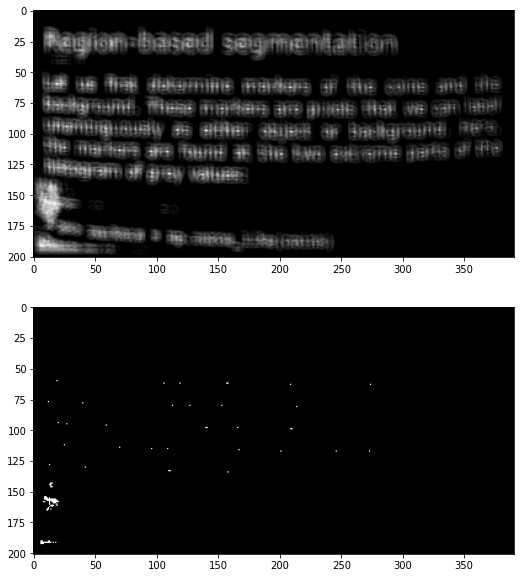

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(211)
out  = signal.convolve2d(img_with_text.astype(np.float), kernel)
plt.imshow(out,cmap="gray")
plt.subplot(212)
plt.imshow(out>0.8*np.max(out),cmap="gray")

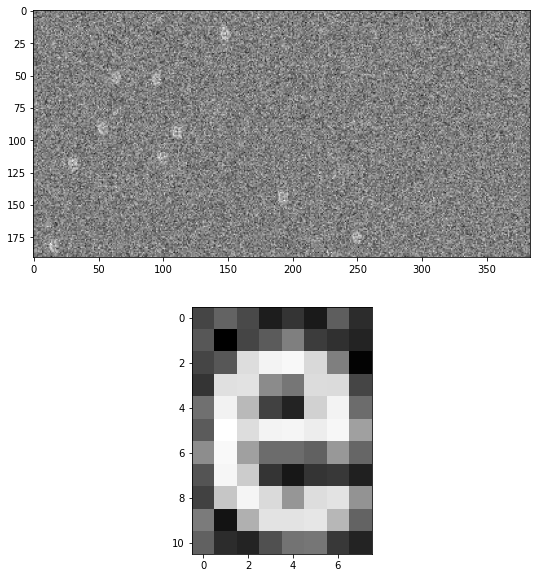

In [75]:
img_with_text = exposure.equalize_hist(data.page())
plt.figure(figsize=(15,10))
plt.subplot(211)
kernel  = 255 -transform.rotate(img_with_text[104:115, 63:71],180)*255
img_with_text =np.ones(shape=img_with_text.shape)*150
random_positions = np.random.rand(10,2)
random_positions[:,0] = random_positions[:,0]* (img_with_text.shape[0] -kernel.shape[0])
random_positions[:,1] = random_positions[:,1]* (img_with_text.shape[1] -kernel.shape[1])
random_positions = np.floor(random_positions).astype(np.uint8)
for rand_pos in random_positions:
    img_with_text[rand_pos[0]:rand_pos[0]+kernel.shape[0],rand_pos[1]:rand_pos[1]+kernel.shape[1]] = transform.rotate(kernel,180)

img_with_text= img_with_text+ np.random.randn(img_with_text.shape[0],img_with_text.shape[1])*50

plt.imshow(img_with_text,cmap="gray")

plt.subplot(212)
plt.imshow(transform.rotate(kernel,180),cmap="gray")

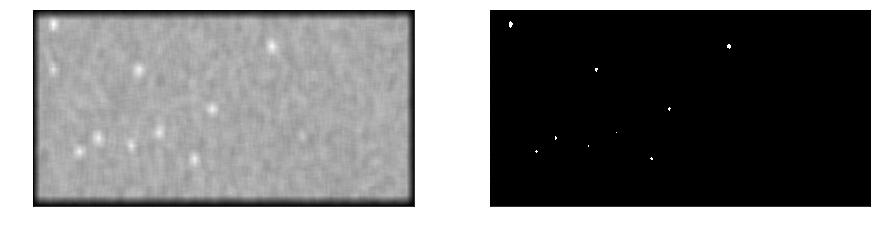

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(121)
out  = signal.convolve2d(img_with_text.astype(np.float), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out>0.9*np.max(out))

# Prerobit cvicenie 1:1
# dokoncit bonusovu ulohu, najst obrazok na internete s vyhladatelnym vzorom

In [ ]:
!wget https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/AT3_1m4_01.tif

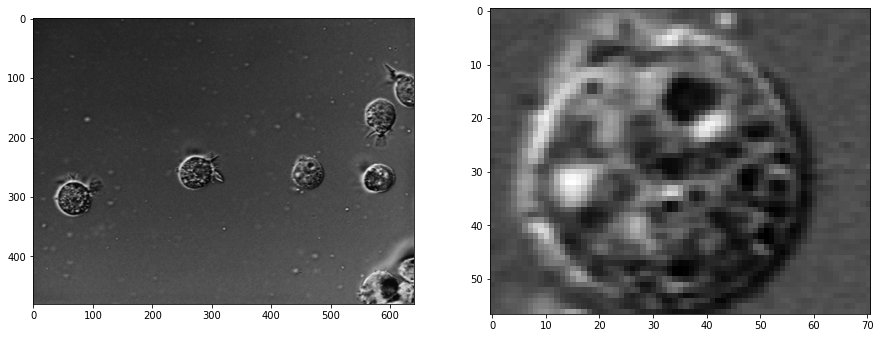

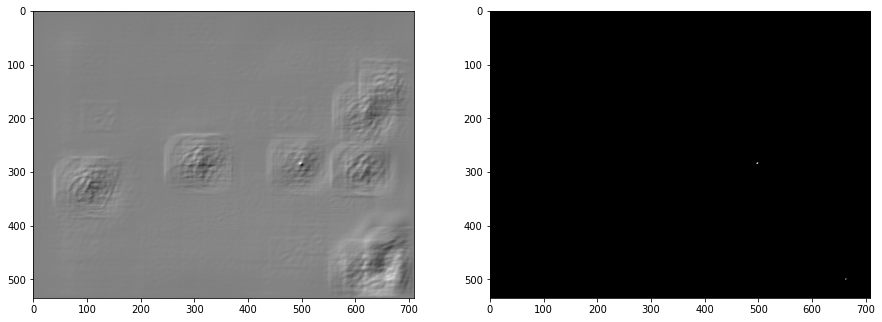

In [73]:
plt.figure(figsize=(15,10))
img = io.imread("./AT3_1m4_01.tif")
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.subplot(122)
kernel = img[230:287,429:500]
plt.imshow(kernel,cmap="gray")




rob_mask1 = np.array([
    [1,0],
    [0,-1]
])

img_rob = signal.convolve2d(img,rob_mask1,mode='valid')

kernel =transform.rotate(kernel,180)

plt.figure(figsize=(15,10))
plt.subplot(121)
out  = signal.convolve2d(img_rob, kernel)
plt.imshow(out,cmap="gray")

plt.subplot(122)
plt.imshow(out>0.7*np.max(out),cmap="gray")
